# **A.I. Blur The Face In Seconds**

## Membuat blur wajah dalam hitungan detik menggunakan deteksi A.I.

A.I. dapat mendeteksi objek yang tidak kita lihat dengan teliti, dan dapat memproses visual yang kita lihat sesuai dengan Prompt yang di inginkan.

Disini saya Ari, akan membuatkan sample A.I. bagai mana mendeteksi wajah dari gambar atau vidio dan membuat wajahnya menjadi **blur** (tidak jelas).

A.I. ini dapat di gunakan untuk **Introgasi, Dokumentasi Wawancara, dan Sensor Film.**

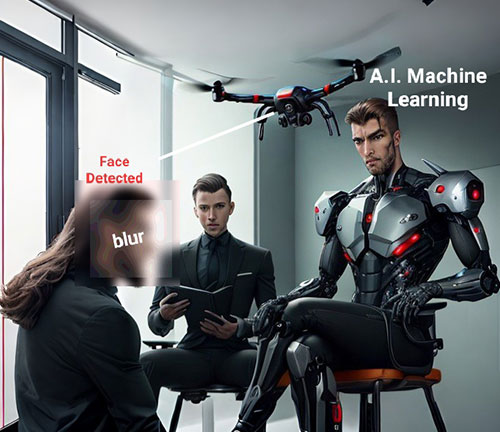

# Library yang di perlukan yaitu opencv, mediapipe, numpy, matplotlib, face-detector, cap.

In [1]:
pip install opencv-python

In [2]:
pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 28.8 MB/s eta 0:00:00


In [3]:
pip install numpy

In [4]:
pip install matplotlib

In [5]:
pip install face-detector

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.9/99.9 kB 11.4 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [9]:
pip install cap

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
from matplotlib import pyplot as plt


#Import Kebutuhan Library

In [10]:
import cv2
import mediapipe as mp
import numpy as np
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils



# **A.I. Blur Face Detection In Photo:**

Text(0.5, 1.0, 'Blured')

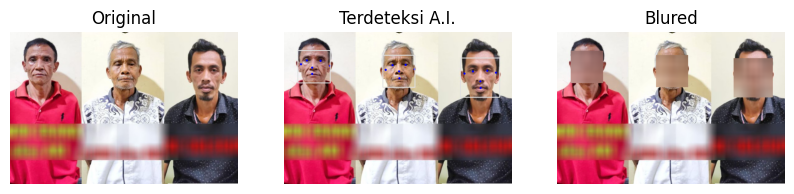

In [ ]:
d =[]
IMAGE_FILES = ['contoh.jpg']
with mp_face_detection.FaceDetection(
    model_selection=1, min_detection_confidence=0.5) as face_detection:
    for idx, file in enumerate(IMAGE_FILES):
        image = cv2.imread(file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         plt.imshow(image)
#         plt.show()
        # Convert the BGR image to RGB and process it with MediaPipe Face Detection.
        results = face_detection.process(image)

        # Draw face detections of each face.
        if not results.detections:
            continue
        censor_image = image.copy()
        annotated_image = image.copy()
        for detection in results.detections:
                x = round((detection.location_data.relative_bounding_box.ymin)*image.shape[0])
                w = round((detection.location_data.relative_bounding_box.height)*image.shape[0])

                y = round((detection.location_data.relative_bounding_box.xmin)*image.shape[1])
                h = round((detection.location_data.relative_bounding_box.width)*image.shape[1])

                crop_image  = image[x:x+w, y:y+h, :]
                kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
                image_blur = cv2.blur(src=crop_image, ksize=(81,81))

                image.shape, image_blur.shape
                censor_image[x:x+w, y:y+h, :] = image_blur

                mp_drawing.draw_detection(annotated_image, detection)
#         plt.imshow(image)
#         plt.show()



#     cv2.imwrite('me_censor' + str(idx) + '.png', annotated_image)


fig, axs = plt.subplots(1,3, figsize=(10, 4))
# fig.suptitle('Face Censor')
axs[0].imshow(image)
axs[0].axis('off')
axs[0].set_title('Original')

axs[1].imshow(annotated_image)
axs[1].axis('off')
axs[1].set_title('Terdeteksi A.I.')

axs[2].imshow(censor_image)
axs[2].axis('off')
axs[2].set_title('Blured')


# **A.I. Blur Face Detection In Video:**

In [11]:
input_video_path = 'video.mp4'
cap = cv2.VideoCapture(input_video_path)
# cap.set(cv2.CAP_PROP_FPS, 10)


# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('output.mp4', fourcc, cap.get(5), (int(cap.get(3)), int(cap.get(4))))



with mp_face_detection.FaceDetection(
        model_selection=0, min_detection_confidence=0.5) as face_detection:

    while cap.isOpened():
        success, image = cap.read()

        if not success:
            print("Ignoring empty camera frame.")
            # If loading a video, use 'break' instead of 'continue'.
            break


        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = face_detection.process(image)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        if results.detections:
            for detection in results.detections:
                try:
                    # find faces and blur them
                    x = round((detection.location_data.relative_bounding_box.ymin) * image.shape[0])
                    w = round((detection.location_data.relative_bounding_box.height) * image.shape[0])

                    y = round((detection.location_data.relative_bounding_box.xmin) * image.shape[1])
                    h = round((detection.location_data.relative_bounding_box.width) * image.shape[1])

                    crop_image = image[x:x + w, y:y + h, :]
                    kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
                    image_blur = cv2.blur(src=crop_image, ksize=(81, 81))

                    image[x:x + w, y:y + h, :] = image_blur
                    out.write(image)
                except:
                    pass


cap.release()
out.release()
print('done :)')

Ignoring empty camera frame.
done :)


# **A.I. Face Blur On Web Camera:**
# Follow Me For Study & Research 😊
